# Part 1: Option Valuation

## Ex. 1: Binomial tree program to approximate the price of the option. 
How does your estimate compare to the analytical value? <br>
Experiment for different values of the volatility

In [30]:
import math
from scipy.stats import norm

In [226]:
stock_price = 100.
strike_price = 99.0
interest_rate = 0.06
volatility = 0.20
steps = 50
T = 1 # maturity time in years

u = math.exp(volatility * math.sqrt(1/steps))
d = math.exp(-volatility * math.sqrt(1/steps))
a = math.exp(interest_rate * 1/steps)
p = (a - d) / (u - d)


''' The bionomial tree. ''' 
def binomial_tree(steps, start):
    ''' Binomial tree to approximate the price of the option. ''' 
    # Result includes stock price [0], option price [1], delta [2]
    results = [[[start, 0, 0]]]
    
    for i in range(steps): 
        result = []
        for j in range(len(results[-1])):
            # calculate the stock price [0]
            if j == 0:
                result.append([results[-1][j][0] * d, 0, 0])
            result.append([results[-1][j][0] * u, 0, 0])
        results.append(result)  
   
    return results


''' Approximate value with the european price call. ''' 
def call_option(S, K):
    ''' Calculates the value of a call option at its expiration date. '''
    return max(0, S - K)

def risk_neutral_valuation(r, dt, fi, fj, p): 
    ''' Risk-neutral valuation of the option. '''
    return math.exp(-r * dt) * (p * fi + (1 - p)*fj)

def price_EU_call(treelist, strike_price, p):
    ''' The price of the European call. '''
    lentree = len(treelist)
    
    # calculate the option prices [1]
    for el in treelist[-1]:
        el[1] = call_option(el[0], strike_price)
        
    # calculate risk neutral valuation: back in time [1]
    for i in range(len(treelist) - 2, -1, -1): # i is time
        for j in range(len(treelist[i])): # j is ????
            treelist[i][j][1] = risk_neutral_valuation(interest_rate, 1/steps, treelist[i+1][j+1][1], treelist[i+1][j][1], p)
   
    return treelist


'''Analytical value'''
def black_scholes(stock_price, strike_price, interest_rate, volatility, T):
    d1 = (math.log(stock_price / strike_price) + (interest_rate + (volatility ** 2) / 2) * T) / (volatility * math.sqrt(T))
    #d2 = d1 - volatility* math.sqrt(T)
    d2 = (math.log(stock_price / strike_price) + (interest_rate - (volatility ** 2) / 2) * T) / (volatility * math.sqrt(T))
   
    call = stock_price * norm.cdf(d1) - strike_price * math.exp(- interest_rate * T) * norm.cdf(d2)
    put = strike_price * math.exp(-interest_rate * T ) * norm.cdf(-d2) - stock_price * norm.cdf(-d1)

    return call, put

In [227]:
''' The estimate compared to the analytical value '''
treelist = binomial_tree(steps, stock_price)
filled_tree = price_EU_call(treelist, strike_price, p)

#The estimate 
estimated_price = filled_tree[0][0][1]
print('The estimated price of the option:', estimated_price)

#The analytical value
analytical_call, analytical_put = black_scholes(stock_price, strike_price, interest_rate, volatility, T)
print('The analytical price of the option:', analytical_call)


The estimated price of the option: 11.546434850755034
The analytical price of the option: 11.544280227051097


In [264]:
''' Different values of volatility '''
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

volatility = np.linspace(0,1,100)

for i in volatility: 
    treelist = binomial_tree(steps, stock_price)
    filled_tree = price_EU_call(treelist, strike_price, p)

    # Estimated  and analytical price
    estimated_price = filled_tree[0][0][1]  
    
plt.plot(len(estimated_prices), estimated_price, label ='Estimated price')
plt.plot(len(analytical_prices), analytical_price, label ='Analytical price')

plt.title('Approximation of the option price')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Option price')
plt.legend(loc = 'best')
plt.show()

NameError: name 'estimated_prices' is not defined

<Figure size 432x288 with 0 Axes>

## Ex. 2: Convergence of the method
What is the computational complexity of this algorithm? <br>
Done

## Ex. 3: Hedge parameter
Compare with the analytical values. 
Experiment for different values of the volatility.

In [34]:
''' The estimation of delta. '''
def estimate_delta(treelist):
    lentree = len(treelist)
    
    for i in range(len(treelist) - 2, -1, -1): # i is time
        for j in range(len(treelist[i])): # j is ????
            treelist[i][j][2] = (treelist[i+1][j+1][1] - treelist[i+1][j][1]) / (treelist[i+1][j+1][0] - treelist[i+1][j][0])
 
    return treelist
            
#SAME CALCULATIOIN, DIFFERENT METHOD TO ESTIMATE THE DELTA
def calc_delta(treelist):
    lentree = len(treelist)
    for j in range(lentree - 1):
        for k in range(len(treelist[-(j+2)])):
            treelist[-(j+2)][k][2] = (treelist[-(j+1)][k][1] - treelist[-(j+1)][k+1][1]) / (treelist[-(j+1)][k][0] - treelist[-(j+1)][k+1][0])
#             if j == 0 and k ==0:
#                 print(treelist[-(j+1)][k][1], treelist[-(j+1)][k+1][1], treelist[-(j+2)][k][1])
    return treelist


''' The analytical delta. '''
def analytical_delta(current_stock_price, strike_price, interest_rate, volatility, T, t, steps):
    d1 = (math.log(current_stock_price / strike_price) + (interest_rate + (volatility ** 2) / 2) * T*(1-t/steps) / (volatility * math.sqrt(T*(1-t/steps))))
    return norm.cdf(d1) 

In [35]:
''' The estimate compared to the analytical value. '''
# The estimate 
estimated_deltas = estimate_delta(filled_tree)
print(estimated_deltas[0])

b = calc_delta(filled_tree)
print(b[0])

# The analytical
current_stock_price = 100
t = 0
anal_delta = analytical_delta(current_stock_price, strike_price, interest_rate, volatility, T, t, steps)
#  d1 = (math.log(b[t][20][0] / strike_price) + (interest_rate + (volatility ** 2) / 2) * T*(1-t/steps) / (volatility * math.sqrt(T*(1-t/steps))))
# print(norm.cdf(d1))

print(anal_delta)


[[100.0, 11.546434850755034, 0.6725569646047738]]
[[100.0, 11.546434850755034, 0.6725569646047738]]
[1.         1.         0.9986058  0.97752926 0.93514575 0.88939234
 0.84857792 0.81433245 0.7860978  0.76285144 0.74362297 0.72761176
 0.71418631 0.70285513 0.69323573 0.6850288  0.67799821 0.67195599
 0.66675106 0.66226093 0.65838535 0.65504164 0.65216105 0.64968598
 0.64756787 0.64576546 0.64424356 0.6429719  0.64192438 0.64107831
 0.64041395 0.63991399 0.6395632  0.63934816 0.63925696 0.63927902
 0.63940488 0.6396261  0.6399351  0.64032503 0.64078974 0.64132365
 0.64192168 0.64257924 0.64329214 0.64405653 0.64486891 0.64572606
 0.64662503 0.64756308 0.64853771 0.6495466  0.65058761 0.65165873
 0.65275813 0.65388408 0.65503499 0.65620937 0.65740583 0.65862306
 0.65985984 0.66111504 0.66238759 0.66367647 0.66498075 0.66629953
 0.66763197 0.66897728 0.67033472 0.67170358 0.67308318 0.6744729
 0.67587214 0.67728031 0.6786969  0.68012137 0.68155324 0.68299205
 0.68443735 0.68588871 0.68734

C:\Users\jaspe\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


## Ex. 4: American option 
What is the value of the American put and call for the corresponding parameters? <br>
Experiment for different values of the volatility.

In [274]:
''' American call option. ''' 
def price_US_call(treelist, strike_price, p):
    lentree = len(treelist)
    for el in treelist[-1]:
        el[1] = call_option(el[0], strike_price)
        
    for i in range(lentree - 1):
        for j in range(len(treelist[-(i+2)])):
            keeping_value = risk_neutral_valuation(interest_rate, 1/steps, treelist[-(i+1)][j+1][1], treelist[-(i+1)][j][1], p)
            use_now_value = call_option(treelist[-(i+2)][j][0], strike_price)
            
            treelist[-(i+2)][j][1] = max(keeping_value, use_now_value)

    return treelist


''' American put option. ''' 
def put_option(S, K ): 
    ''' Calculates the value of a put option at its expiration date. '''
    return max(0, K - S)

def price_US_put(treelist, strike_price, p):
    lentree = len(treelist)
    for el in treelist[-1]:
        el[1] = put_option(el[0], strike_price)
        
    for i in range(lentree - 1):
        for j in range(len(treelist[-(i+2)])):
            keeping_value = risk_neutral_valuation(interest_rate, 1/steps, treelist[-(i+1)][j+1][1], treelist[-(i+1)][j][1], p)
            use_now_value = put_option(treelist[-(i+2)][j][0], strike_price)
            
            treelist[-(i+2)][j][1] = max(keeping_value, use_now_value)

    return treelist
    

In [275]:
''' The American put and call option. '''
treelist = binomial_tree(steps, stock_price)

treelist2 = binomial_tree(steps, stock_price)
call_US = price_US_call(treelist, strike_price, p)
put_US = price_US_put(treelist2, strike_price, p)

print('The American call option: ', call_US[0][0][1])
print('The American put option:', put_US[0][0][1])
# Call is altijd meer waard dan een put 


The American call option:  11.539710421694856
The American put option: 5.346494347391209


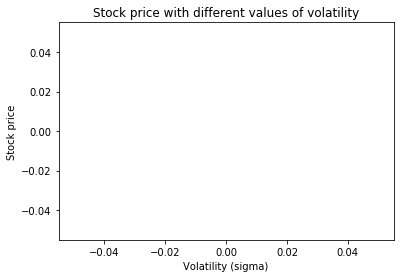

In [276]:
''' Different values of volatility. '''

plt.plot()
plt.title('Stock price with different values of volatility')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Stock price')
plt.show()

# Part 2: Hedging Simulations

In [277]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [319]:
stock_price = 100.0
strike_price = 99.0
interest_rate = 0.06
volatility = 0.2
T = 1
steps = 365

u = math.exp(volatility * math.sqrt(1/steps))
d = math.exp(-volatility * math.sqrt(1/steps))
a = math.exp(interest_rate * 1/steps)
p = (a - d) / (u - d)


def dynamics_stock_price(r, S, dt, sigma):
    ''' The dynamics of the stock price S. '''
    dZ = np.random.normal() * math.sqrt(dt)

    return S + r*S*dt + sigma * S * dZ


''' The analytical delta. '''
def analytical_delta(current_stock_price, strike_price, interest_rate, volatility, T, t, steps):
    #print((steps - t)/steps)
    d1 = (math.log(current_stock_price / strike_price) + (interest_rate + (volatility ** 2) / 2) * ((steps - t)/steps)) / (volatility * math.sqrt((steps - t)/steps))
    return norm.cdf(d1) 


stock_over_time = [stock_price]
anal_delta = []
for t in range(steps):
    stock_over_time.append(dynamics_stock_price(interest_rate, stock_over_time[-1], T/steps, volatility))
    anal_delta.append(analytical_delta(stock_over_time[-1], strike_price, interest_rate, volatility, T, t, steps))

In [320]:
call_prices = []
for i in range(steps):
    print(stock_over_time[i], strike_price, interest_rate, volatility, T*(1-i/steps))    
    call, put = black_scholes(stock_over_time[i], strike_price, interest_rate, volatility, T*(1-i/steps))
    print(call)
    print()
    call_prices.append(call)

100.0 99.0 0.06 0.2 1.0
11.544280227051097

99.88327537340854 99.0 0.06 0.2 0.9972602739726028
11.446720277526481

98.4145942840174 99.0 0.06 0.2 0.9945205479452055
10.461654023996147

98.74615441325113 99.0 0.06 0.2 0.9917808219178083
10.657364846275179

97.91087394169882 99.0 0.06 0.2 0.989041095890411
10.102328798786488

98.90211493827492 99.0 0.06 0.2 0.9863013698630136
10.721156463137369

98.9102272692746 99.0 0.06 0.2 0.9835616438356164
10.707515556374368

99.28417844727136 99.0 0.06 0.2 0.9808219178082191
10.93381012334153

99.9314276575543 99.0 0.06 0.2 0.9780821917808219
11.345273026296383

100.9424558343454 99.0 0.06 0.2 0.9753424657534246
12.013673304060397

100.48618102442735 99.0 0.06 0.2 0.9726027397260274
11.681800672476335

97.98582052584894 99.0 0.06 0.2 0.9698630136986301
10.018549174941235

98.5010932657983 99.0 0.06 0.2 0.9671232876712329
10.328704718042275

97.38491653117535 99.0 0.06 0.2 0.9643835616438357
9.60392918891226

97.13716301017641 99.0 0.06 0.2 0.961643

0.27282792984446314

78.07053153516149 99.0 0.06 0.2 0.43561643835616437
0.2650045225664739

75.91682242318234 99.0 0.06 0.2 0.4328767123287671
0.1525193570357386

76.29654012015999 99.0 0.06 0.2 0.4301369863013699
0.1648182492072512

75.94758600852307 99.0 0.06 0.2 0.4273972602739726
0.14741855752272892

73.46211597043855 99.0 0.06 0.2 0.4246575342465754
0.07211305380620736

71.44000928019749 99.0 0.06 0.2 0.4219178082191781
0.037560156589975136

70.38834281682041 99.0 0.06 0.2 0.4191780821917809
0.0256846479298668

70.50611847916967 99.0 0.06 0.2 0.4164383561643835
0.0259121746536366

70.58636517808162 99.0 0.06 0.2 0.41369863013698627
0.025805457994525494

70.96719654260167 99.0 0.06 0.2 0.410958904109589
0.0284680333307189

70.66293903353807 99.0 0.06 0.2 0.40821917808219177
0.02485293950114542

71.3143846548723 99.0 0.06 0.2 0.4054794520547945
0.03006962998672036

71.08727865941431 99.0 0.06 0.2 0.40273972602739727
0.026964878105451784

69.47383711718722 99.0 0.06 0.2 0.4
0.014662

69.23829475853069 99.0 0.06 0.2 0.046575342465753455
4.316027520121519e-17

68.0547195975189 99.0 0.06 0.2 0.043835616438356206
1.1719630947303286e-19

67.52496425813747 99.0 0.06 0.2 0.04109589041095896
1.179653347695512e-21

67.75693974649477 99.0 0.06 0.2 0.0383561643835616
1.0519975535713498e-22

66.8301227596531 99.0 0.06 0.2 0.03561643835616435
5.802960810446258e-26

68.09850172810377 99.0 0.06 0.2 0.0328767123287671
1.4649125483719767e-25

68.22416599955268 99.0 0.06 0.2 0.03013698630136985
1.817969066223354e-27

67.61255771937752 99.0 0.06 0.2 0.0273972602739726
2.187266570412697e-31

67.2913494542302 99.0 0.06 0.2 0.024657534246575352
1.808966549250747e-35

67.9622874903636 99.0 0.06 0.2 0.021917808219178103
9.335863071742803e-38

67.88105548730893 99.0 0.06 0.2 0.019178082191780854
4.166403596504012e-43

67.26894384157235 99.0 0.06 0.2 0.016438356164383605
3.1659537921944822e-52

67.9186605738556 99.0 0.06 0.2 0.013698630136986356
2.7842711243424105e-59

66.70179683044384 99.

In [321]:
1*(1-265/365)

0.273972602739726

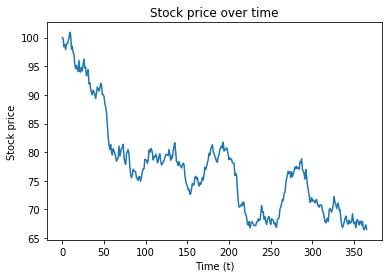

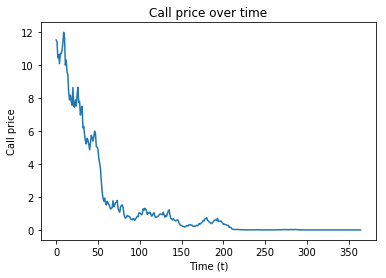

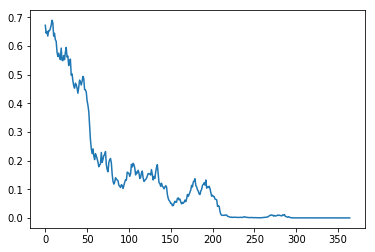

In [322]:
#Plot of the stock price over time
plt.plot(stock_over_time)
plt.title('Stock price over time')
plt.xlabel('Time (t)')
plt.ylabel('Stock price')
plt.show()

plt.plot(call_prices)
plt.title('Call price over time')
plt.xlabel('Time (t)')
plt.ylabel('Call price')
plt.show()

plt.plot(anal_delta)
plt.show()

In [323]:
print(len(stock_over_time))

366


In [324]:
print(len(call_prices))

365


In [350]:
print(stock_over_time[40])

106.18231949406946


In [351]:
print(anal_delta[40])

0.7599192700126811


In [352]:
print(call_prices[40])

15.23219958329382


In [353]:
1*(1-40/365)

0.8904109589041096

In [370]:
hedgetime = 1

money = []
call_value = []
delta_list = []
folio_price = []

for i in range(steps):
    if i == 0:
        call_value.append(call_prices[i])
        delta_list.append(anal_delta[i])
        folio_price.append(anal_delta[i] * stock_over_time[i])
        money.append(call_prices[i] - anal_delta[i] * stock_over_time[i])
    elif i%hedgetime == 0:
        call_value.append(call_prices[i])
        money.append(money[-1] * ((1 + interest_rate)**(hedgetime/steps)) - (anal_delta[i] - delta_list[-1]) * stock_over_time[i])
        delta_list.append(anal_delta[i])
        folio_price.append(anal_delta[i] * stock_over_time[i])
        
#print(money)
#print(call_value)
#print(delta_list)
#print(folio_price)
money[-1] = money[-1] - max(0, stock_over_time[-1] - stock_over_time[0])
        

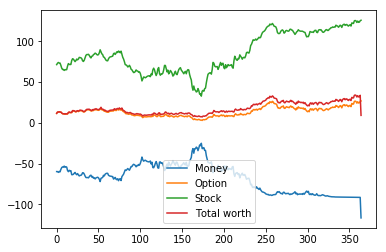

In [371]:
plt.plot(range(len(money)), money, label = "Money")
plt.plot(range(len(money)), call_value, label= "Option")
#plt.plot(range(len(money)), delta_list = "")
plt.plot(range(len(money)), folio_price, label = "Stock")
plt.plot(range(len(money)), [money[i] + folio_price[i] for i in range(len(money))], label = "Total worth")

plt.legend()
plt.show()

In [355]:
call_value[-1]-[money[i] + folio_price[i] for i in range(len(money))][-1]

-7.512892775543463

In [358]:
stock_over_time[-1]

125.1714234206678

In [337]:
from scipy import stats

0
100
200
300
400
500
600
700
800
900
[4.351911773393098, 9.923658328330873, -8.481120207404672, 8.339946173010327, 8.313448335549623, 3.6380893163377697, -17.458432333529345, 9.039089782967457, 11.160096979123328, 4.913528557481673, -43.423388750844865, 7.200138843686872, 6.377498794784702, 7.785334168461082, -49.32625287855102, -16.063600897508252, 12.592192450516599, 11.492462775912927, 11.672339220477571, 8.858438304941263, 11.285179006201298, -57.556953877074235, -2.891237970362724, -13.121755906239173, 11.50335686229064, 4.0513967865046965, 12.383126395788928, -2.3295994728208314, -11.962096192922871, -7.612254292195786, -5.089282651972397, 6.20774984671057, 9.755351895341718, 12.120801688595403, 14.186084071956387, 9.177022085921799, -31.8486050013302, 7.214575664347072, 11.043237612941809, -9.702514985367557, -6.172304019096572, 10.767495483793926, 8.098344872770094, 4.07559423004561, 12.56677489292069, 13.355702117584212, -55.059198883875396, -6.972687081305054, 6.829981967797

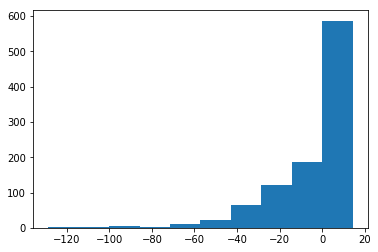

In [374]:
end_change = []
for i in range(1000):
    if i%100 == 0:
        print(i)
    stock_over_time = [stock_price]
    anal_delta = []
    for t in range(steps):
        stock_over_time.append(dynamics_stock_price(interest_rate, stock_over_time[-1], T/steps, volatility))
        anal_delta.append(analytical_delta(stock_over_time[-1], strike_price, interest_rate, volatility, T, t, steps))
        
    call_prices = []
    for i in range(steps):
        call, put = black_scholes(stock_over_time[i], strike_price, interest_rate, volatility, T*(1-i/steps))
        call_prices.append(call)
        
    money = []
    call_value = []
    delta_list = []
    folio_price = []
    
    for i in range(steps):
        if i == 0:
            call_value.append(call_prices[i])
            delta_list.append(anal_delta[i])
            folio_price.append(anal_delta[i] * stock_over_time[i])
            money.append(call_prices[i] - anal_delta[i] * stock_over_time[i])
        elif i%hedgetime == 0:
            call_value.append(call_prices[i])
            money.append(money[-1] * (1 + interest_rate)**(hedgetime/steps) - (anal_delta[i] - delta_list[-1]) * stock_over_time[i])
            delta_list.append(anal_delta[i])
            folio_price.append(anal_delta[i] * stock_over_time[i])
        
    money[-1] = money[-1] - max(0, stock_over_time[-1] - strike_price)

    end_change.append(money[-1] + folio_price[-1]-call_prices[-1])
print(end_change)

plt.hist(end_change)
plt.show()

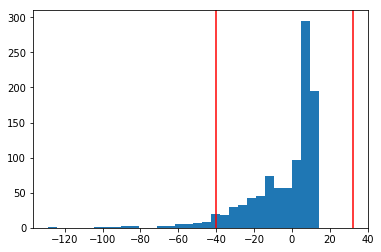

In [377]:
CI = stats.norm.interval(0.95, loc = np.mean(end_change), scale = np.std(end_change)) # check this
plt.axvline(CI[0], color = 'r')
plt.axvline(CI[1], color = 'r')
plt.hist(end_change, bins = 30)
plt.show()

In [376]:
np.mean(end_change)

-3.9325098396901

In [291]:
print(black_scholes(86, 99, 0.06, 0.2, 0.5))

(1.5889752584718053, 11.663083079774097)
